In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from autorank import autorank, create_report, plot_stats, latex_table, latex_report

In [2]:
Sensitivity_3x10fold_NB = np.array([78.846,82.692,71.154,80.769,80.769,65.385,78.846,77.358,66.038,83.019,82.692,80.769,73.077,84.615,73.077,75,71.154,60.377,77.358,92.453,76.923,63.462,73.077,78.846,86.538,78.846,92.308,71.698,71.698,71.698])
Sensitivity_3x10fold_kNN = np.array([17.308,28.846,21.154,34.615,28.846,23.077,34.615,28.302,35.849,32.075,30.769,40.385,23.077,28.846,15.385,25,23.077,22.642,30.189,37.736,30.769,25,28.846,26.923,28.846,19.231,28.846,18.868,37.736,15.094])
Sensitivity_3x10fold_ANN  = np.array([82.692,78.846,86.538,92.308,34.615,0,55.769,47.17,60.377,32.075,5.769,19.231,90.385,63.462,25,11.538,75,90.566,60.377,83.019,21.154,3.846,100,36.538,94.231,28.846,80.769,79.245,98.113,3.774])
Sensitivity_3x10fold_DT = np.array([82.692,88.462,76.923,88.462,96.154,73.077,73.077,79.245,79.245,90.566,84.615,86.538,78.846,80.769,71.154,84.615,88.462,75.472,79.245,96.226,71.154,69.231,84.615,82.692,73.077,88.462,96.154,77.358,75.472,83.019])
Sensitivity_3x10fold_SVM = np.array([78.846,90.385,82.692,86.538,90.385,73.077,82.692,73.585,81.132,83.019,84.615,84.615,82.692,82.692,75,80.769,82.692,77.358,81.132,88.679,75,73.077,86.538,84.615,86.538,82.692,88.462,81.132,81.132,84.906])
Sensitivity_3x10fold_RF  = np.array([75,84.615,76.923,82.692,90.385,71.154,80.769,73.585,77.358,83.019,76.923,86.538,76.923,86.538,69.231,82.692,80.769,73.585,71.698,94.34,78.846,75,80.769,82.692,78.846,78.846,88.462,83.019,83.019,81.132])
Sensitivity_3x10fold_XGB  = np.array([76.923,86.538,78.846,80.769,96.154,67.308,71.154,77.358,81.132,81.132,76.923,84.615,82.692,92.308,75,80.769,78.846,73.585,81.132,92.453,76.923,73.077,80.769,82.692,75,82.692,94.231,75.472,77.358,84.906])

sensitivity = np.array([Sensitivity_3x10fold_NB,
                        Sensitivity_3x10fold_kNN,
                        Sensitivity_3x10fold_ANN,
                        Sensitivity_3x10fold_DT,
                        Sensitivity_3x10fold_SVM,
                        Sensitivity_3x10fold_RF,
                        Sensitivity_3x10fold_XGB ])

In [3]:
sensitivity = sensitivity.transpose()

clf_names =['NB', 'kNN', 'ANN', 'DT', 'SVM', 'RF', 'XGB'] # Name for algorithms

data_names = [] # Names for every test (from 3x 10-fold cross validation
for i in range (1, 31):
    data_names.append('Group ' + str(i))

sensitivity = pd.DataFrame(sensitivity, index=data_names, columns=clf_names) # data for calculating statistics
sensitivity

,NB,kNN,ANN,DT,SVM,RF,XGB
Group 1,78.846,17.308,82.692,82.692,78.846,75.000,76.923
Group 2,82.692,28.846,78.846,88.462,90.385,84.615,86.538
Group 3,71.154,21.154,86.538,76.923,82.692,76.923,78.846
Group 4,80.769,34.615,92.308,88.462,86.538,82.692,80.769
Group 5,80.769,28.846,34.615,96.154,90.385,90.385,96.154
Group 6,65.385,23.077,0.000,73.077,73.077,71.154,67.308
Group 7,78.846,34.615,55.769,73.077,82.692,80.769,71.154
Group 8,77.358,28.302,47.170,79.245,73.585,73.585,77.358
Group 9,66.038,35.849,60.377,79.245,81.132,77.358,81.132
Group 10,83.019,32.075,32.075,90.566,83.019,83.019,81.132


The statistical analysis was conducted for 7 populations with 30 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.014). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and reject the null hypothesis (p=0.000) that thedata is homoscedastic. Thus, we assume that our data is heteroscedastic.
Because we have more than two populations and the populations are normal but heteroscedastic, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the mean value (M), the standard deviation (SD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference

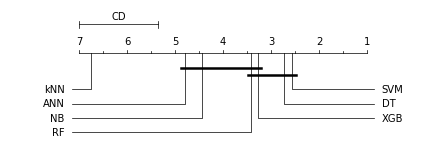

In [4]:
res = autorank(sensitivity) # Running test
create_report(res) # Generating report
latex_report(res)  # Generating report and figure (in PDF format)